## Fourier Transforms Example: Light Switch

Suppose we turn a light switch at $t=t_0-\tau/2$, and turn it off at $t=t_0+\tau/2$. We treat $\tau$ and $t_0$ as constant parameters. The light emitted during this interval has average frequency $\nu_0$, also a constant parameter.

The electric field (complex number!) emitted is:
$$E = E_0\text e^{-2 i\pi \nu_0 t}\quad \text{if}\quad t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2,\qquad E = 0\quad\text{otherwise}.$$

Apply the Fourier Transform formula to get the field in "frequency space", i.e. as a function of frequency $\nu$ rather than time $t$.
$$\hat E = \int_{t_0-\tau/2}^{t_0+\tau/2} E(t)\text e^{2\pi i (\nu-\nu_0) t} \text d \nu = E_0\tau \text e^{2\pi i (\nu-\nu_0) t_0}\underbrace{\frac{\sin\left[\pi(\nu-\nu_0)\tau\right]}{\pi(\nu-\nu_0)\tau}}_{=\text{sinc}\left[(\nu-\nu_0)\tau\right]},$$
where $\text{sinc}$ is called the Cardinal sine function.

Let's use parameters: $\tau = 1s,~t_0 = 10s,~\nu_0=5$ Hz

### Exercise 1

Calculate and plot the mormalized real part of the field, $Re(E) / E_0$, from $t_0 - \frac\tau2\leq t\leq t_0 + \frac\tau2$. Hint: when discretizing time, try using 4096 values.

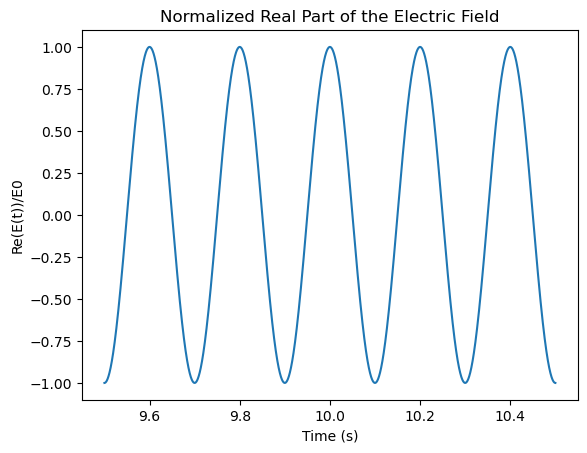

In [96]:
import numpy as np
from matplotlib import pyplot as plt

tau = 1  # s
t0 = 10  # s
v0 = 5   # Hz

# Electric field
def E(t, tau, t0, v0):
    if t0 - tau/2 <= t <= t0 + tau/2:
        return np.real(np.exp(-2j * np.pi * v0 * t))
    return 0


time = np.linspace(t0 - tau/2, t0 + tau/2, 1024 * 4)
eField = [E(t, tau, t0, v0) for t in time]

plt.plot(time, eField)
plt.title("Normalized Real Part of the Electric Field")
plt.xlabel("Time (s)")
plt.ylabel("Re(E(t))/E0")
plt.show()


### Exercise 2

Now calculate, using the formula given (not using a packaged routine), the Fourier transform of the signal, i.e. $\hat{E}(\nu)$, for $0 \leq \nu \leq \nu_0$. Make two plots: $Re(\hat{E}) / (E_0 \tau)$ as a function of $\nu$, and $|\hat{E}| / (E_0 \tau) $ as a function of $\nu$. The second plot, which shows normalized amplitudes, is called the spectrum of the signal.

Note:
* Spectrum is centred around $\nu=\nu_0$, but non-negligible width (i.e. not all the light has frequency exactly $\nu_0$.) So the plane wave approximation doesn't exactly hold.
* If you increase duration or increase frequency: spectrum is narrower around $\nu=\nu_0$, and you have a better plane wave approximation.
* If you shorten duration or decrease frequency (e.g. pulsed laser): the frequency spreads out. (See https://www.nobelprize.org/prizes/physics/2023/press-release/ , Nobel Prize for attosecond lasers)
* Bandwidth theorem:
    $$\tau\Delta\nu \approx 1$$
    *You may recognize something like Heisenberg's uncertainty principle!*

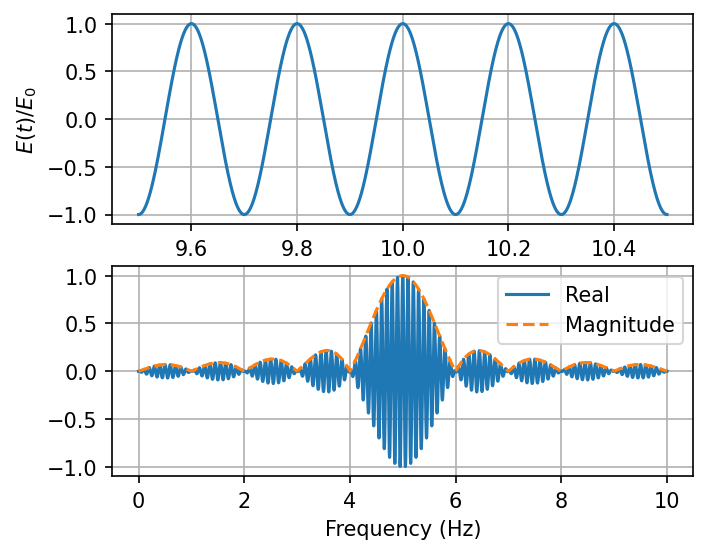

In [98]:
v = np.linspace(0, 2*v0, 1024*4) 

Ehat = np.exp(2j * np.pi * (v - v0) * t0) * np.sinc((v - v0) * tau)

def plot_FT():
    plt.figure(figsize=(5, 4), dpi=150)
    
    plt.subplot(211)
    plt.plot(time, eField)
    plt.grid()
    plt.xlabel('time $t$ (s)')
    plt.ylabel('$E(t)/E_0$')
    
    plt.subplot(212)
    plt.plot(v, np.real(Ehat), label='Real')
    plt.plot(v, np.abs(Ehat), '--', label='Magnitude')
    plt.grid()
    plt.xlabel('Frequency (Hz)')
    plt.legend()
    plt.show()

plot_FT()

## DFT Example: Pitch (Sound) Timeseries

Adapted from textbook's online material.

### Exercise 3

Using numpy.loadtxt, read in the text file "pitch.txt" provided. The values are floats. 

The file represents a "time series" of samples of the pitch of a sound wave, i.e. the next value in the series represents the pitch at the next sample. The samples are taken at a frequency of 44100 Hz.

Make a plot of pitch (arbitrary units) vs time.

In [ ]:
pitch = np.loadtxt("pitch.txt")

Fs = 44100 # Sample rate (Hz)
time = np.arange(0., len(pitch)) / Fs

plt.figure(figsize=(10, 5))
plt.plot(time, pitch)
plt.title("Pitch vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Pitch (arbitrary units)")
plt.grid(True)
plt.show()

### Exercise 4

Perform a Discrete Fourier Transform on the time series (the following code snippet from the textbook will help you). Using time.time, measure how long the transform takes. 

Plot the amplitudes (i.e. magnitudes) of the Fourier coefficients.

In [ ]:
import numpy as np
import time

def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c


# Start time
start_time = time.time()

pitch_dft = dft(pitch)

# End time
end_time = time.time()

# Time required
execution_time = end_time - start_time
print(f"The code took {execution_time} seconds to execute.")

N = len(pitch)
frequencies = np.fft.rfftfreq(N, d=1/Fs)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(pitch_dft))
plt.title("Magnitude of the DFT of the Pitch Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

## FFT Example: De-Noising a Signal

### Exercise 5

Repeat Exercise 4, but using numpy.fft.rfft instead of the dft code snippet from the textbook. Which algorithm is faster, and by how much? How close are the transform results?

In [ ]:
import numpy as np
import time

# Start time
start_time = time.time()

pitch_dft = np.fft.rfft(pitch)

# End time
end_time = time.time()

# Time required
execution_time = end_time - start_time
print(f"The code took {execution_time} seconds to execute.")

N = len(pitch)
frequencies = np.fft.rfftfreq(N, d=1/Fs)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(pitch_dft))
plt.title("Magnitude of the DFT of the Pitch Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

The numpy function is faster than the dft function by several orders of magnitude. It took 8.726119995117188e-05 seconds to execute compared to the 0.6851739883422852 seconds taken by dft().

### Exercise 6

We now seek to "de-noise" the signal. We will treat the three highest-amplitude frequencies as our "signal" which we want to isolate, and everything else as the "noise" which we want to eliminate. 

Convert the Fourier coefficients to frequencies by dividing them by $T$ (the total length of the time interval covered by the time series.) Now you should have an array of frequencies and an array of corresponding amplitudes.

Sort the frequencies by amplitude (you can use numpy.argsort if you like). Print the three "signal" frequencies, and their corresponding amplitudes.

In [ ]:
# Sort frequencies by magnitude of DFT coefficients
sorted_indices = np.argsort(np.abs(pitch_dft)**2)[::-1]
top_3_indices = sorted_indices[:3]

# Print top 3 frequencies and their corresponding amplitudes
print("Top three frequencies and their amplitudes:")
for idx in top_3_indices:
    freq = frequencies[idx]
    amp = np.abs(pitch_dft[idx])
    print(f"Frequency: {freq:.2f} Hz, Amplitude: {amp:.2f}")


### Exercise 7

Now we will isolate the "noise".

Create a copy of the array of amplitudes (use numpy.copy). In the copy, zero out the largest three amplitudes (which you identified in the previous exercise). Inverse-transform the result, using np.fft.irfft, to get an array of pitch values. Plot it vs time.

In [ ]:
# Zero out the top 3 amplitudes in the copy
pitch_dft_copy = np.copy(pitch_dft)
pitch_dft_copy[top_3_indices] = 0

# Inverse transform
pitch_inverse = np.fft.irfft(pitch_dft_copy)
time = np.arange(0, N) / Fs

# Original pitch signal
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time, pitch)
plt.title("Original Pitch Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Noise signal
plt.plot(time[:len(pitch_inverse)], pitch_inverse)
plt.title("Pitch Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

### Exercise 8

Finally, let's plot the signal, i.e. the data with the noise subtracted out. Subtract your Exercise 7 array of pitch values from your original (Exercise 3) array of pitch values. Plot the result vs time.

Does the plot look a lot different from the results of Exercise 3?

In [ ]:
# Denoised signal
denoised = pitch - pitch_inverse

# Plot the noise (i.e., the removed components)
plt.figure(figsize=(10, 5))
plt.plot(time, denoised)
plt.title("Denoised Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

The denoised signal is clearly much smoother yet retains the core periodic features of the original pitch signal, with the noise effectively reduced. 